In [130]:
## Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [131]:
data = pd.read_csv("gamess.csv")
data.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005,2,2,180,180,180,13,20113,8.33774,8.22186,26647.0,372.0,1219.0,5865.0,5347.0,2562.0,3.4785
1,120677,boardgame,Terra Mystica,2012,2,5,150,60,150,12,14383,8.28798,8.14232,16519.0,132.0,1586.0,6277.0,2526.0,1423.0,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013,1,7,210,30,210,12,9262,8.28994,8.06886,12230.0,99.0,1476.0,5600.0,1700.0,777.0,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006,2,4,240,240,240,12,13294,8.20407,8.05804,14343.0,362.0,1084.0,5075.0,3378.0,1642.0,4.1590
4,3076,boardgame,Puerto Rico,2002,2,5,150,90,150,12,39883,8.14261,8.04524,44362.0,795.0,861.0,5414.0,9173.0,5213.0,3.2943


In [132]:
data.shape

(41031, 20)

In [133]:
data.describe()

,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
count,41031.000000,41031.000000,41031.000000,41031.000000,41031.000000,41031.000000,41031.000000,41031.000000,41031.000000,41031.000000,41030.000000,41030.000000,41030.000000,41030.000000,41030.000000,41030.000000,41030.000000,41030.000000
mean,28977.342302,1864.237771,2.031025,5.459531,60.985572,59.116205,60.985572,6.926129,304.687115,4.748838,1.999443,453.382208,16.801633,21.637144,74.435608,92.301414,31.415696,1.199730
std,32802.112144,493.775150,0.906412,58.626117,356.912031,344.698507,356.912031,4.984414,1593.210424,2.541983,2.787165,2056.575758,54.420463,83.114447,329.687936,394.699391,161.639757,1.197742
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10570.500000,1982.000000,2.000000,2.000000,10.000000,10.000000,10.000000,0.000000,1.000000,3.800000,0.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,21532.000000,1998.000000,2.000000,4.000000,30.000000,30.000000,30.000000,8.000000,7.000000,5.568380,0.000000,19.000000,1.000000,1.000000,2.000000,4.000000,1.000000,1.000000
75%,32355.500000,2005.000000,2.000000,6.000000,60.000000,60.000000,60.000000,12.000000,62.000000,6.582325,5.533720,158.000000,8.000000,6.000000,15.000000,29.000000,8.000000,2.000000
max,183880.000000,2016.000000,40.000000,11299.000000,60000.000000,60000.000000,60000.000000,90.000000,53680.000000,10.000000,8.221860,73188.000000,1395.000000,1586.000000,6402.000000,11798.000000,5996.000000,5.000000


In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41031 entries, 0 to 41030
Data columns (total 20 columns):
id                      41031 non-null int64
type                    41031 non-null object
name                    41029 non-null object
yearpublished           41031 non-null int64
minplayers              41031 non-null int64
maxplayers              41031 non-null int64
playingtime             41031 non-null int64
minplaytime             41031 non-null int64
maxplaytime             41031 non-null int64
minage                  41031 non-null int64
users_rated             41031 non-null int64
average_rating          41031 non-null float64
bayes_average_rating    41030 non-null float64
total_owners            41030 non-null float64
total_traders           41030 non-null float64
total_wanters           41030 non-null float64
total_wishers           41030 non-null float64
total_comments          41030 non-null float64
total_weights           41030 non-null float64
average_weight    

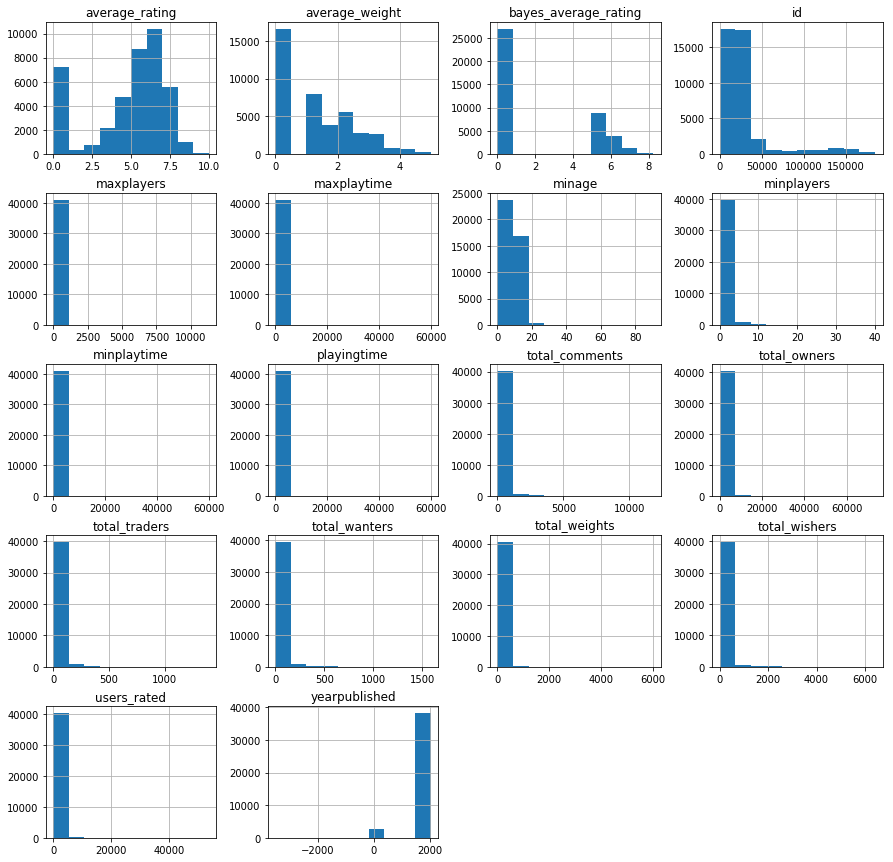

In [135]:
data.hist(figsize=(15,15))
plt.show()

In [136]:
## Print the first row of all the games  with zero score
print(data[data['average_rating']==0].iloc[0])

## Print the first row of games with scores greater than zeroes
print(data[data['average_rating'] >0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

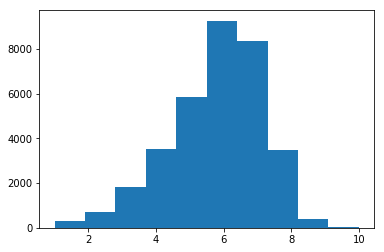

In [137]:
## Remove any row without user reviews
data = data[data['users_rated']>0]

## Remove any rows with missing values

data = data.dropna(axis=0)

## MAke a histogram of all the average ratings
plt.hist(data['average_rating'])
plt.show()

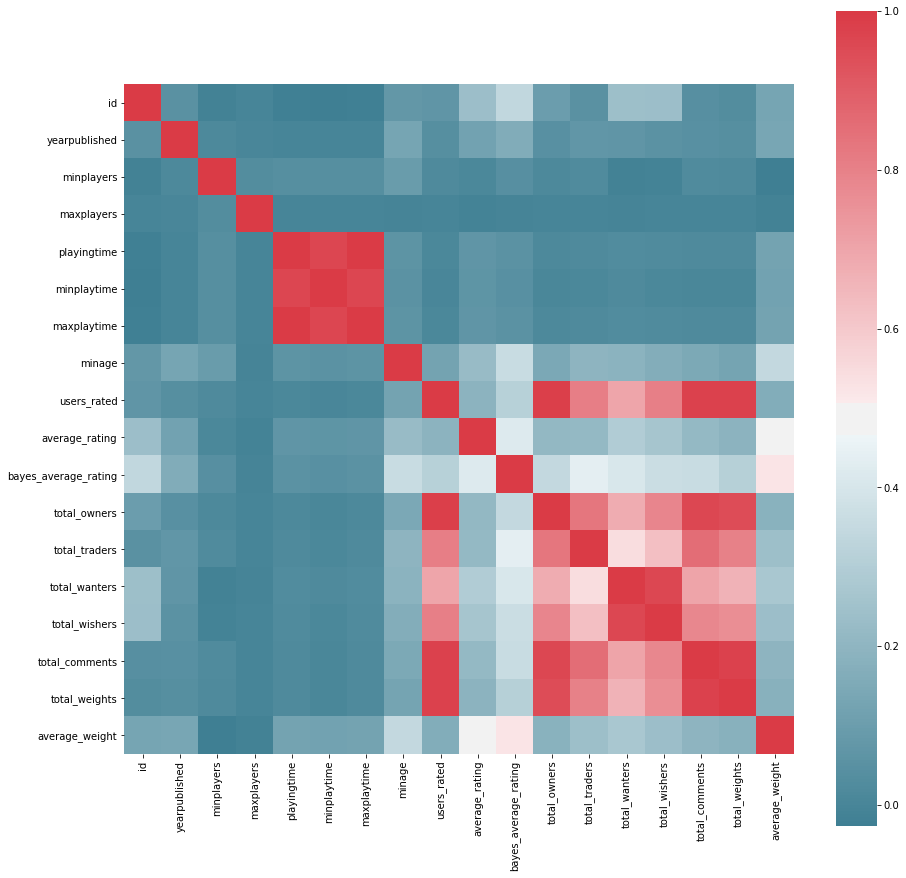

In [138]:
### Correlation 

f ,ax = plt.subplots(figsize = (15,15))

corr = data.corr()

sns.heatmap(corr,mask=np.zeros_like(corr,dtype = np.bool),cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, annot = False,ax=ax)

In [139]:
## Get all the columns from the dataframe
columns = data.columns.tolist()

## Filter the columns we donot want
columns = [c for c in columns if c not in ['id','average_rating','name','type','bayes_average_rating']]

## Store the variable we are predicating on

target = 'average_rating'



In [140]:
### Split into trainig and testing data
train = data.sample(frac=0.8,random_state=1)

test = data.loc[~data.index.isin(train.index)]

In [141]:
X = train[columns]
Y = train[target]

In [142]:
##Linear Regression
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [143]:
X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()

In [144]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         average_rating   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     699.1
Date:                Tue, 04 Jun 2019   Prob (F-statistic):               0.00
Time:                        18:25:24   Log-Likelihood:                -43276.
No. Observations:               27022   AIC:                         8.658e+04
Df Residuals:                   27007   BIC:                         8.670e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.5680      0.039    117.

In [145]:
columns = [c for c in columns if c not in ['minplaytime','maxplaytime']]
X = train[columns]
Y = train[target]
X = sm.add_constant(X)

model_1 = sm.OLS(Y,X).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:         average_rating   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     752.9
Date:                Tue, 04 Jun 2019   Prob (F-statistic):               0.00
Time:                        18:25:29   Log-Likelihood:                -43276.
No. Observations:               27022   AIC:                         8.658e+04
Df Residuals:                   27008   BIC:                         8.669e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.5680      0.039    117.

In [146]:
columns = [c for c in columns if c not in ['total_weights']]
X = train[columns]
Y = train[target]
X = sm.add_constant(X)

model_2 = sm.OLS(Y,X).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:         average_rating   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     815.7
Date:                Tue, 04 Jun 2019   Prob (F-statistic):               0.00
Time:                        18:25:33   Log-Likelihood:                -43276.
No. Observations:               27022   AIC:                         8.658e+04
Df Residuals:                   27009   BIC:                         8.668e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.5678      0.039    117.

In [147]:
columns = [c for c in columns if c not in ['maxplayers']]
X = train[columns]
Y = train[target]
X = sm.add_constant(X)

model_3 = sm.OLS(Y,X).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:         average_rating   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     889.7
Date:                Tue, 04 Jun 2019   Prob (F-statistic):               0.00
Time:                        18:25:37   Log-Likelihood:                -43277.
No. Observations:               27022   AIC:                         8.658e+04
Df Residuals:                   27010   BIC:                         8.668e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.5675      0.039    117.

### Our linear model is not going to fit, we can see from heat map our independent variables are not linear with dependent variable

In [148]:
### Random Forest Regressor
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

In [149]:
## filter out columns

cols = data.columns.tolist()
cols = [c for c in cols if c not in ['id','name','type','average_rating','bayes_average_rating']]
target ='average_rating'

In [150]:
x = train[cols]
y=train[target]

x_test = test[cols]
y_test = test[target]

In [151]:
RFR = RandomForestRegressor(n_estimators =100 ,random_state=12345)
RFR.fit(x,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=12345, verbose=0,
           warm_start=False)

In [152]:
predict_test = RFR.predict(x_test)

In [153]:
## Compute the error between actual and predicted values
from sklearn.metrics import mean_squared_error
print("The RMSE : {}".format(mean_squared_error(y_test,predict_test)))

The RMSE : 1.153313079088208


In [154]:
from sklearn.metrics import r2_score
print("R-squared : {}".format(r2_score(y_test,predict_test)))

R-squared : 0.4212190489026999


In [159]:
### Now select the relevant features

df = pd.DataFrame({"Feature": cols,"Importances":RFR.feature_importances_})
df.sort_values(by=['Importances'],ascending=False)

,Feature,Importances
11,total_wishers,0.266055
0,yearpublished,0.112434
8,total_owners,0.091486
14,average_weight,0.080460
10,total_wanters,0.072278
6,minage,0.055087
2,maxplayers,0.054033
7,users_rated,0.052832
12,total_comments,0.049912
9,total_traders,0.041578


In [156]:
### Feature selection using RFE
from sklearn.feature_selection import RFE
selector = RFE(RFR)
selector.fit(x,y)

RFE(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=12345, verbose=0,
           warm_start=False),
  n_features_to_select=None, step=1, verbose=0)

In [157]:
selector.support_

array([ True, False, False, False,  True, False, False,  True,  True,
       False,  True,  True, False, False,  True])

In [158]:
selector.ranking_

array([1, 8, 2, 7, 1, 6, 4, 1, 1, 5, 1, 1, 3, 9, 1])

In [119]:
selector.get_support()

array([ True, False, False, False,  True, False, False,  True,  True,
       False,  True,  True, False, False,  True])

In [121]:
df = pd.DataFrame({"feature":cols,"Ranking":selector.ranking_})
df = df.sort_values(by=['Ranking'])
df

,feature,Ranking
0,yearpublished,1
4,minplaytime,1
7,users_rated,1
8,total_owners,1
10,total_wanters,1
11,total_wishers,1
14,average_weight,1
2,maxplayers,2
12,total_comments,3
6,minage,4


In [125]:
cols_RFE = ['yearpublished','minplaytime','users_rated','total_owners','total_wanters','average_weight']
target = 'average_rating'

x_train = train[cols_RFE]
y_train = train[target]
x_test = test[cols_RFE]
y_test = test[target]

In [126]:
randomForest = RandomForestRegressor(n_estimators =100 ,random_state=12345)
randomForest.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=12345, verbose=0,
           warm_start=False)

In [127]:
pred_test = randomForest.predict(x_test)

In [128]:
print("RMSE after feature selection: {}".format(mean_squared_error(y_test,pred_test)))

RMSE after feature selection: 1.3622750803068244


In [129]:
print("R-squared after feature selection : {}".format(r2_score(y_test,pred_test)))

R-squared after feature selection : 0.3163531386815812


In [160]:
### Feature selection using Random Forest

cols_RFR = ['total_wishers','yearpublished','total_owners','average_weight','total_wanters','minage','maxplayers','users_rated']

x_train  =train[cols_RFR]
y_train = train['average_rating']


x_test  =test[cols_RFR]
y_test = test['average_rating']

In [161]:
randomForest.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=12345, verbose=0,
           warm_start=False)

In [162]:
pred_2 = randomForest.predict(x_test)

In [163]:
print("RMSE : {}".format(mean_squared_error(y_test,pred_2)))

RMSE : 1.2629573274606636


In [164]:
print("R-squared : {}".format(r2_score(y_test,pred_2)))

R-squared : 0.3661949591685152


In [165]:
### PCA

from sklearn.decomposition import PCA
pca = PCA